In [227]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [228]:
df = pd.read_csv('04-data/preprocessed_app_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45536 entries, 0 to 45535
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   title                     45536 non-null  object 
 1   description               45536 non-null  object 
 2   summary                   45520 non-null  object 
 3   installs                  45536 non-null  object 
 4   minInstalls               45536 non-null  float64
 5   score                     45536 non-null  float64
 6   ratings                   45536 non-null  float64
 7   reviews                   45536 non-null  float64
 8   histogram                 45536 non-null  object 
 9   price                     45536 non-null  float64
 10  free                      45536 non-null  int64  
 11  currency                  45536 non-null  object 
 12  sale                      45536 non-null  bool   
 13  offersIAP                 45536 non-null  bool   
 14  inAppP

In [229]:
df1 = df[['title','minInstalls','ratings','free','containsAds','genre',
          'editorsChoice','contentRating','year','top_developer','has_video','score']]

In [230]:
df1.head()

,title,minInstalls,ratings,free,containsAds,genre,editorsChoice,contentRating,year,top_developer,has_video,score
0,World War 2: Offline Strategy,1000000.0,19080.0,1,1,Strategy,0,Everyone 10+,2018,0,1,4.147644
1,AndroXLS editor for XLS sheets,5000000.0,9215.0,1,1,Productivity,0,Everyone,2016,0,1,2.973147
2,SoundSeeder -Play music simultaneously and in ...,1000000.0,7347.0,1,1,Music & Audio,0,Everyone,2013,0,1,3.747968
3,LibreOffice & OpenOffice document reader | ODF,5000000.0,32406.0,1,1,Productivity,0,Everyone,2010,0,0,3.882280
4,"All PDF - PDF Reader, PDF Viewer & PDF Converter",1000000.0,10073.0,1,1,Books & Reference,0,Everyone,2018,0,1,4.376968


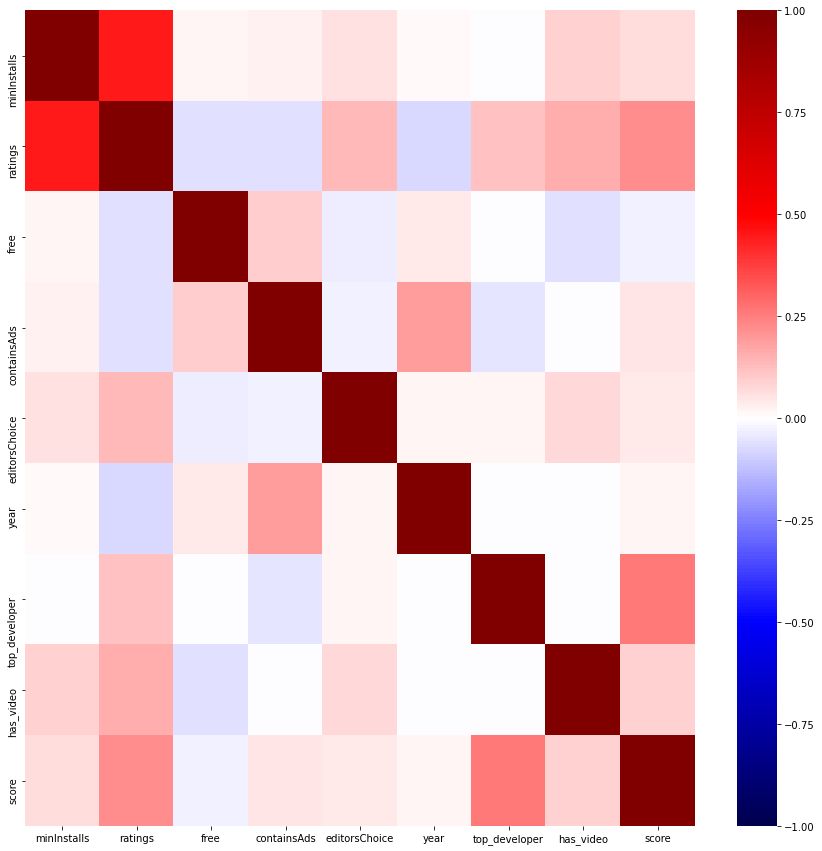

In [231]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1.corr(), cmap="seismic", vmin=-1, vmax=1, ax=ax);

#### Observations

Fairly strong correlation between minInstalls and number of ratings. Consider dropping mininstalls given it is bucketed

<ipython-input-232-05a121070c82>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','score']], ax=ax);


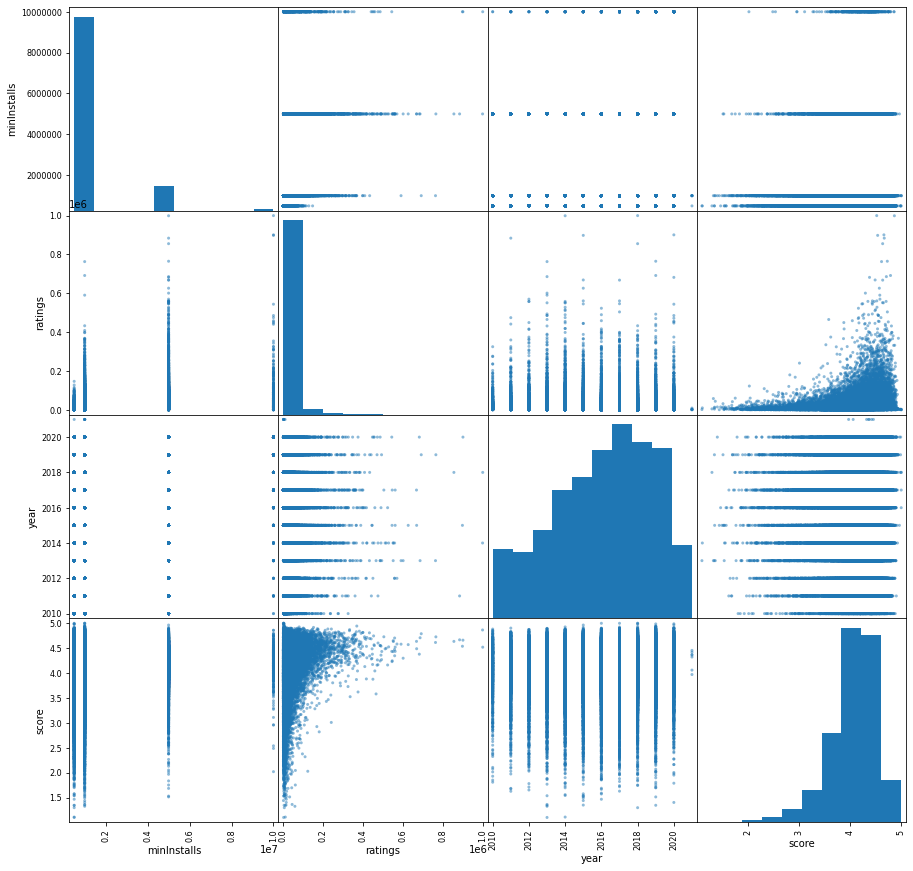

In [232]:
fig, ax = plt.subplots(figsize=(15, 15))
pd.plotting.scatter_matrix(df1[['minInstalls','ratings','year','score']], ax=ax);

#### Observations

Score (target) has a left skew although should be normally distributed enough for predictive purposes

Almost exponential shape for ratings?

In [233]:
print('Average app score overall: {:.3f}'.format(df1['score'].mean()))
print('Median app score overall: {:.3f}'.format(df1['score'].median()))

Average app score overall: 4.055
Median app score overall: 4.126


### By content rating

In [234]:
df1.groupby('contentRating')['contentRating'].count()

contentRating
Everyone        35044
Everyone 10+     2008
Mature 17+       1730
Teen             6754
Name: contentRating, dtype: int64

In [235]:
df1.groupby('contentRating')['score'].mean()

contentRating
Everyone        4.059119
Everyone 10+    4.081159
Mature 17+      3.997434
Teen            4.038562
Name: score, dtype: float64

### By app genre

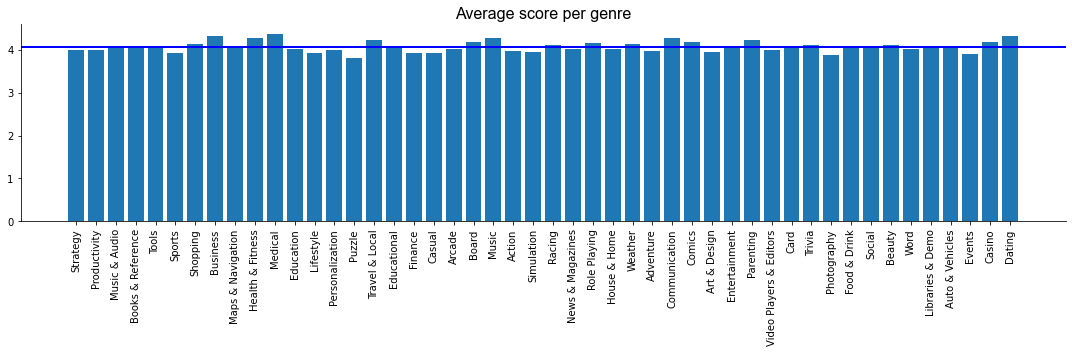

In [236]:
app_genre_score = df.groupby('genre')['score'].mean()
genre_list = df1['genre'].unique()
mean_score = df1['score'].mean()

plt.figure(figsize=[15,5])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axhline(mean_score, label= 'Mean score', color = 'blue', linewidth=2)
plt.bar(genre_list,app_genre_score)   
plt.xticks(genre_list,rotation=90)
plt.title('Average score per genre',family='arial',fontsize=16)
plt.tight_layout()

plt.show;

Does not appear to be significant differences in mean user score across genres

In [237]:
df1.groupby('genre')['score'].mean()

genre
Action                     3.992775
Adventure                  3.986540
Arcade                     4.057587
Art & Design               4.055487
Auto & Vehicles            4.087533
Beauty                     3.917746
Board                      4.137118
Books & Reference          4.319548
Business                   4.058160
Card                       4.264464
Casino                     4.368929
Casual                     4.020887
Comics                     3.928807
Communication              3.996342
Dating                     3.803210
Education                  4.213506
Educational                4.054093
Entertainment              3.917161
Events                     3.917039
Finance                    4.021618
Food & Drink               4.177637
Health & Fitness           4.264867
House & Home               3.969754
Libraries & Demo           3.934510
Lifestyle                  4.098631
Maps & Navigation          4.021803
Medical                    4.147807
Music                 

### By whether the app contains ads

In [238]:
df1.groupby('containsAds')['score'].mean()

containsAds
0    4.008720
1    4.066047
Name: score, dtype: float64

Does not appear to be a large difference in apps that do / don't contain ads

### By whether the app is an Editor's Choice

In [239]:
df1.groupby('editorsChoice')['editorsChoice'].count()

editorsChoice
0    45256
1      280
Name: editorsChoice, dtype: int64

In [240]:
df1.groupby('editorsChoice')['score'].mean()

editorsChoice
0    4.052988
1    4.331097
Name: score, dtype: float64

Apps marked as 'Editor's Choice' appear to have higher average score. Makes sense given likely to promote higher quality apps

### By whether the app is free

In [241]:
df1.groupby('free')['free'].count()

free
0      193
1    45343
Name: free, dtype: int64

In [242]:
df1.groupby('free')['score'].mean()

free
0    4.231391
1    4.053946
Name: score, dtype: float64

Paid-for apps appear to have a higher average score. This makes sense given you expect highr quality when you are paying for access

### By top developer in terms of average app score

In [243]:
df1.groupby('top_developer')['score'].mean()

top_developer
0    4.033504
1    4.749462
Name: score, dtype: float64

### By whether the app posting has a video

In [244]:
df1.groupby('has_video')['has_video'].count()

has_video
0    31329
1    14207
Name: has_video, dtype: int64

In [245]:
df1.groupby('has_video')['score'].mean()

has_video
0    4.025834
1    4.118348
Name: score, dtype: float64